In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.tree import plot_tree

### variable_data_dummy 實證資料集

In [121]:
df = pd.read_csv('variable_data_dummy.csv', index_col = [2])

In [122]:
df['change'] = (df['收盤價(元)']>df['收盤價(元)'].shift(1)).astype('int')

In [125]:
X, y = df.iloc[:len(df), 8:18].shift(1)[1:], df['change'][1:] # X落後一期預估未來漲跌 # 歸一化用 [:len(df), 10:20][:len(df), 0:10]

In [107]:
# 隨機切
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [142]:
# 切時間 2013-2020
split_index = 1927
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]
X_train

,SMA,WMA,Momentum,Stoch K%,Stoch D%,RSI,MACD,LW R%,A/D oscillator,CCI
年月日,,,,,,,,,,
2013/3/1,-0.966333,-0.965447,0.255863,-0.661114,0.283919,0.087827,0.227387,0.661114,0.006778,-0.398306
2013/3/4,-0.965241,-0.964806,0.270069,0.183252,0.217597,0.277360,0.227205,-0.183252,0.207330,-0.013551
2013/3/5,-0.966676,-0.967691,0.215364,-0.801537,0.052142,-0.016594,0.224014,0.801537,-0.252919,-0.349538
2013/3/6,-0.967207,-0.968079,0.214005,-0.073505,-0.037509,0.155834,0.221013,0.073505,0.156588,-0.139124
2013/3/7,-0.968691,-0.967769,0.256584,0.178713,-0.130329,0.198885,0.218652,-0.178713,0.099508,0.182787
...,...,...,...,...,...,...,...,...,...,...
2020/12/25,0.219821,0.222083,0.268872,0.265715,0.169781,0.281202,0.601423,-0.265715,0.229079,0.289501
2020/12/28,0.221134,0.225141,0.317440,0.550951,0.172199,0.337629,0.584170,-0.550951,0.122255,0.508522
2020/12/29,0.226259,0.233147,0.457819,1.000000,0.244362,0.485837,0.572786,-1.000000,0.157274,0.744862


In [94]:
'''
# 2000~2013 2014~2018
split_index = 231
split_index_1 = 3729
X_train = X[split_index:split_index_1]
X_test = X[split_index_1:]
y_train = y[split_index:split_index_1]
y_test = y[split_index_1:]
X_test
'''

,SMA,WMA,Momentum,Stoch K%,Stoch D%,RSI,MACD,LW R%,A/D oscillator,CCI
年月日,,,,,,,,,,
2014-01-02,0.295440,0.306127,0.200664,0.772370,0.478485,0.651459,0.160592,-0.772370,0.766942,0.533848
2014-01-03,0.302350,0.312458,0.157286,0.741488,0.631346,0.653358,0.173911,-0.741488,0.767866,0.391786
2014-01-06,0.305998,0.314393,0.106493,0.209762,0.655299,0.311069,0.183445,-0.209762,0.729133,0.176306
2014-01-07,0.308397,0.313449,0.035021,-0.428863,0.606503,0.121493,0.187819,0.428863,0.760659,0.004142
2014-01-08,0.309861,0.312656,0.048837,-0.371690,0.507057,0.161957,0.188912,0.371690,0.799979,-0.007671
...,...,...,...,...,...,...,...,...,...,...
2018-12-24,0.627106,0.620406,-0.043995,-0.575495,-0.458434,-0.199972,-0.067700,0.575495,0.717562,-0.321326
2018-12-25,0.625340,0.615424,-0.131666,-0.620569,-0.450507,-0.210049,-0.075371,0.620569,0.760932,-0.278981
2018-12-26,0.617752,0.605402,-0.248885,-0.755510,-0.504513,-0.370611,-0.087672,0.755510,0.714600,-0.474633


In [ ]:
#找最適參數
param_grid = {'n_estimators': range(1, 50), 'max_depth': range(1, 10)}
rf = RandomForestClassifier(n_estimators=1, random_state=100, max_depth=3) 
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
#print(f"Best n_estimators: {grid_search.best_params_['n_estimators']}")
#print(f"Best max_depth: {grid_search.best_params_['max_depth']}")
a = grid_search.best_params_['n_estimators']
b = grid_search.best_params_['max_depth']

# Random Forest Model
rf = RandomForestClassifier(n_estimators=a, random_state=100, max_depth=b) #n_estimators:樹的數量；max_depth:樹的最大深度
rf.fit(X_train, y_train) # 訓練模型
y_pred = rf.predict(X_test) # 預測
precision = precision_score(y_test, y_pred)
print(f"模型精確率: {precision:.4f}")

Fitting 5 folds for each of 441 candidates, totalling 2205 fits


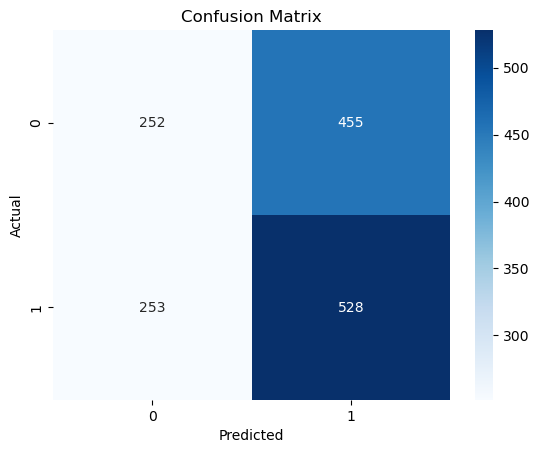

In [111]:
cm = confusion_matrix(y_test, y_pred) 
plt.figure() 
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

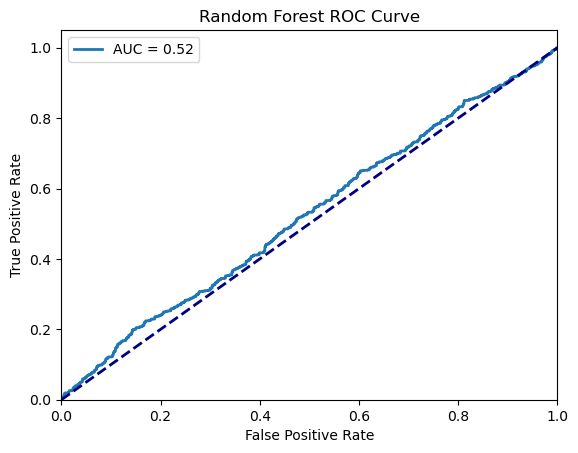

AUC 值: 0.523632343113587


In [112]:
# 繪製 ROC 曲線
y_score = rf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='upper left')
plt.show()
print("AUC 值:", roc_auc)

### 變數重要程度

In [113]:
predictor = list(df.columns[0:10])

Text(0.5, 1.0, 'Random Forest Importance')

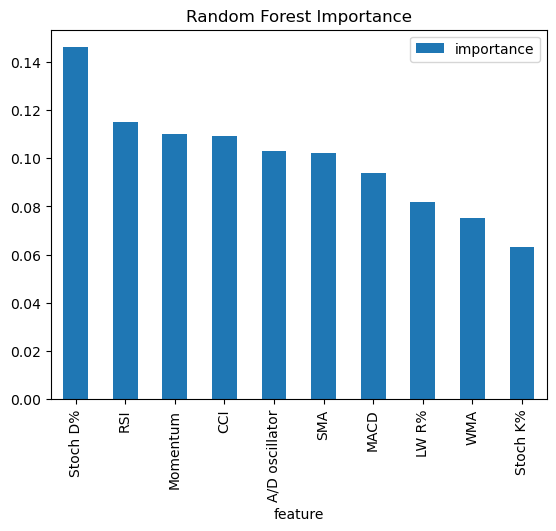

In [114]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()
plt.title('Random Forest Importance')

### 畫樹

In [115]:
from sklearn.tree import plot_tree

In [116]:
feature_names = list(df.columns[0:10]) #[0:10]][10:20]
target_names = ['down', 'up']

C:\ANACONDA\Lib\site-packages\sklearn\tree\_export.py:664: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  ann.update_bbox_position_size(renderer)
C:\ANACONDA\Lib\site-packages\sklearn\tree\_export.py:664: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from current font.
  ann.update_bbox_position_size(renderer)
C:\ANACONDA\Lib\site-packages\sklearn\tree\_export.py:664: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  ann.update_bbox_position_size(renderer)
C:\ANACONDA\Lib\site-packages\sklearn\tree\_export.py:664: UserWarning: Glyph 21315 (\N{CJK UNIFIED IDEOGRAPH-5343}) missing from current font.
  ann.update_bbox_position_size(renderer)
C:\ANACONDA\Lib\site-packages\sklearn\tree\_export.py:664: UserWarning: Glyph 32929 (\N{CJK UNIFIED IDEOGRAPH-80A1}) missing from current font.
  ann.update_bbox_position_size(renderer)
C:\ANACONDA\Lib\site-packages\sklearn\tree\_export.py:664: UserWarning

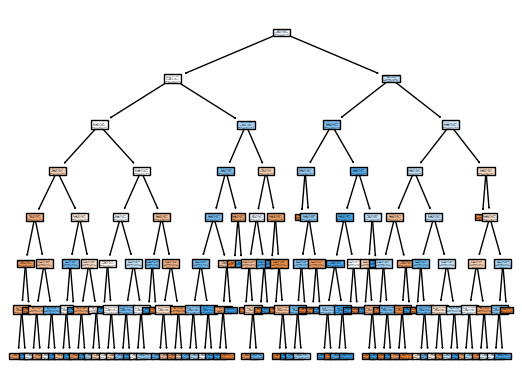

In [119]:
rf.fit(X, y)

# 從随机森林中提取单棵决策树
estimator = rf.estimators_[0]  # 0~21

# 畫樹
plt.figure()
plot_tree(estimator, feature_names=feature_names, class_names=target_names, filled=True, proportion=True)
plt.show()